In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [328]:
df=pd.read_csv('worldhappiness.csv')

In [329]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [330]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [331]:
df.shape


(158, 12)

In [332]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [333]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [334]:
df.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

In [335]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [336]:
df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [337]:
df.isnull().sum()
#checking missing values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

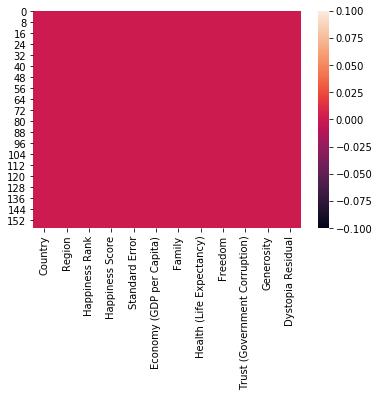

In [338]:
 sns.heatmap(df.isnull())
#no missing value is present

In [339]:
dfcor=df.corr()

In [340]:
dfcor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


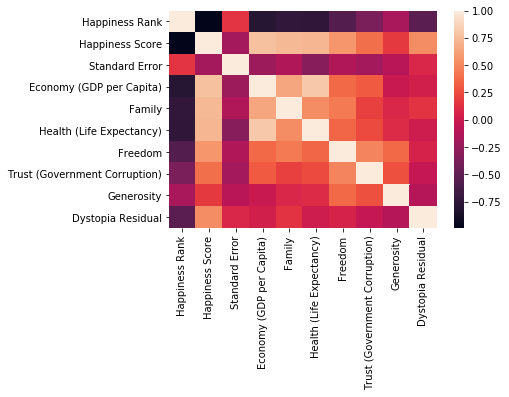

In [341]:
#cheking corelation
sns.heatmap(dfcor)

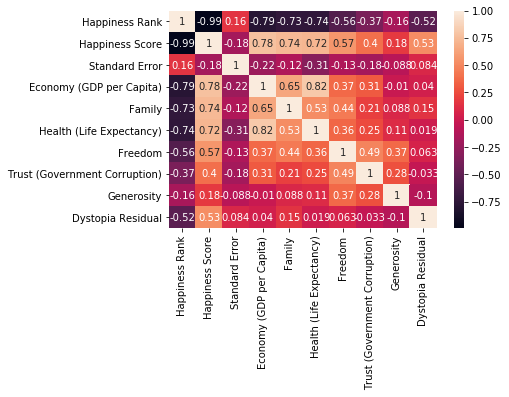

In [342]:
sns.heatmap(dfcor,annot=True)

In [343]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

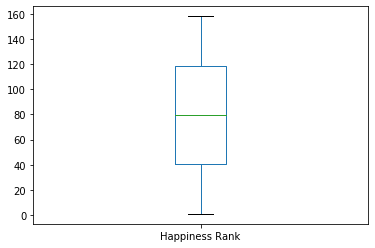

In [344]:
df['Happiness Rank'].plot.box()

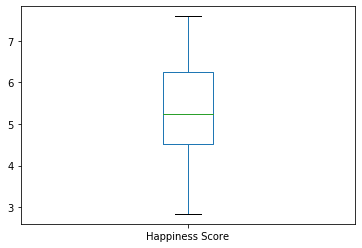

In [345]:
df['Happiness Score'].plot.box()

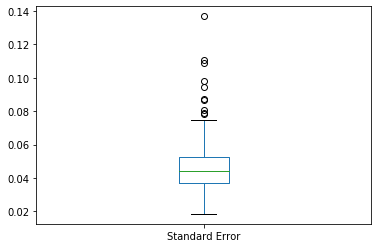

In [346]:
df['Standard Error'].plot.box()

#outliers present in it.

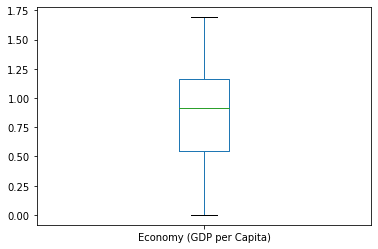

In [347]:
df['Economy (GDP per Capita)'].plot.box()

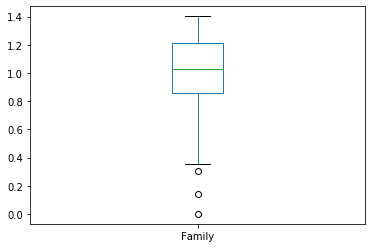

In [348]:
df['Family'].plot.box()

In [349]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

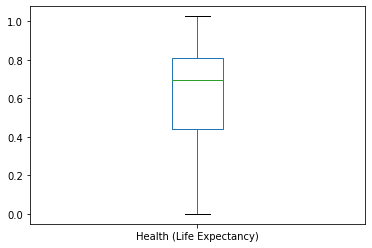

In [350]:
df['Health (Life Expectancy)'].plot.box()

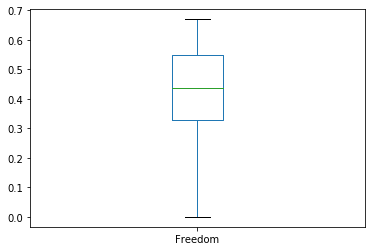

In [351]:
df['Freedom'].plot.box()

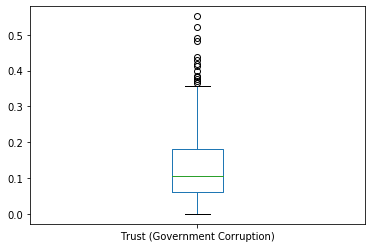

In [352]:
df['Trust (Government Corruption)'].plot.box()

#outliers present in it.

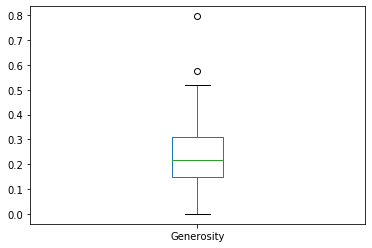

In [353]:
df['Generosity'].plot.box()

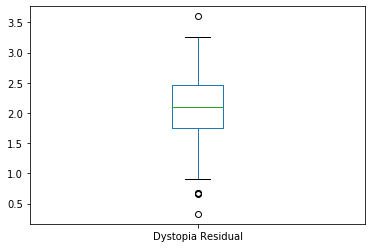

In [354]:
df['Dystopia Residual'].plot.box()

In [355]:
df.shape

(158, 12)

Happiness Rank                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Happiness Score                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Standard Error                    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Economy (GDP per Capita)          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Family                              AxesSubplot(0.125,0.518913;0.168478x0.16413)
Health (Life Expectancy)         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Freedom                          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Trust (Government Corruption)    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Generosity                          AxesSubplot(0.125,0.321957;0.168478x0.16413)
Dystopia Residual                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

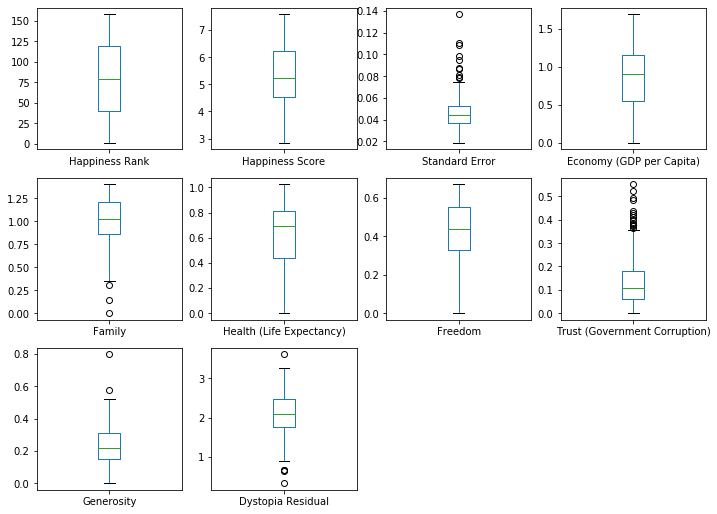

In [356]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

# Skewnwss of data

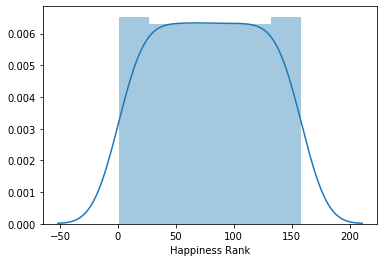

In [357]:
sns.distplot(df['Happiness Rank'])

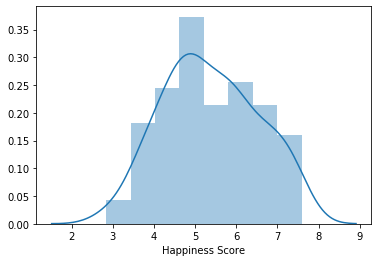

In [358]:
sns.distplot(df['Happiness Score'])

In [359]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

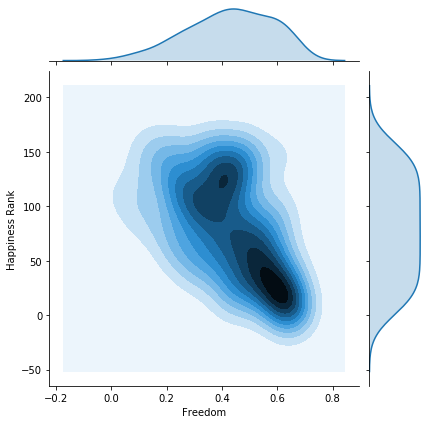

In [480]:
sns.jointplot(data=df, x='Freedom', y='Happiness Rank',kind='kde')

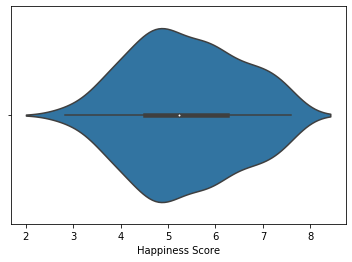

In [484]:
sns.violinplot(x='Happiness Score',data=df)

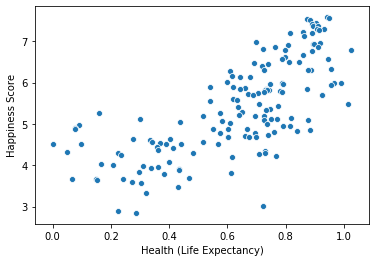

In [483]:
sns.scatterplot(data=df, x='Health (Life Expectancy)', y='Happiness Score')

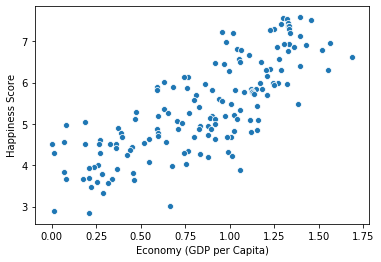

In [481]:
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y='Happiness Score')

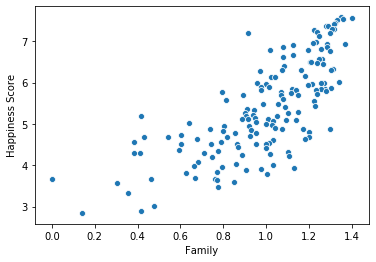

In [482]:
sns.scatterplot(data=df, x='Family', y='Happiness Score')

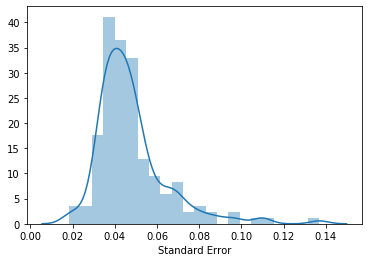

In [360]:
sns.distplot(df['Standard Error'])

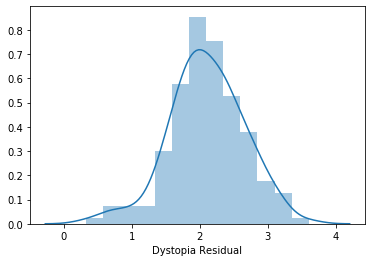

In [361]:
sns.distplot(df['Dystopia Residual'])

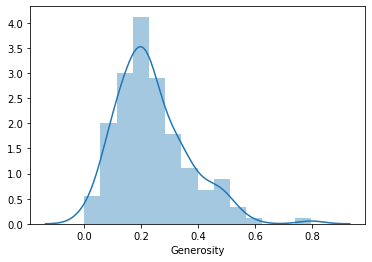

In [362]:
sns.distplot(df['Generosity'])

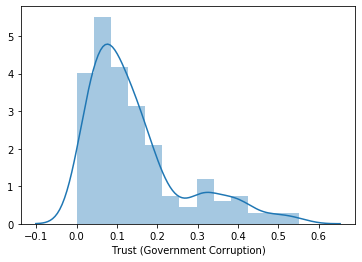

In [363]:
sns.distplot(df['Trust (Government Corruption)'])

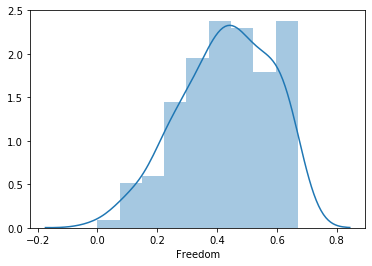

In [364]:
sns.distplot(df['Freedom'])

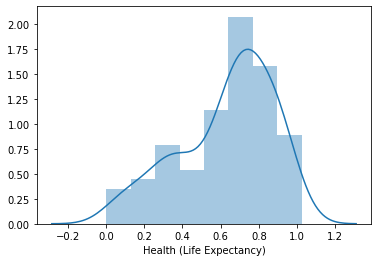

In [365]:
sns.distplot(df['Health (Life Expectancy)'])

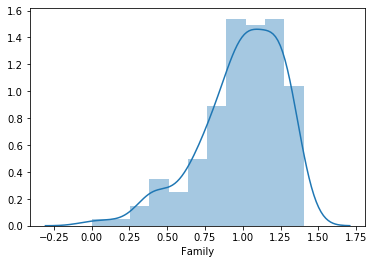

In [366]:
sns.distplot(df['Family'])

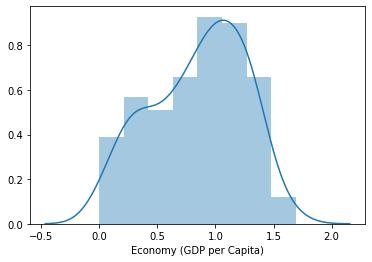

In [367]:
sns.distplot(df['Economy (GDP per Capita)'])

In [368]:
df.drop('Standard Error',axis=1,inplace=True)

In [369]:
df.drop('Trust (Government Corruption)',axis=1,inplace=True)

In [370]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [371]:
df.drop('Country',axis=1,inplace=True)

In [372]:
df.drop('Region',axis=1,inplace=True)

In [373]:
df.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [374]:
df.skew()

Happiness Rank              0.000418
Happiness Score             0.097769
Economy (GDP per Capita)   -0.317575
Family                     -1.006893
Health (Life Expectancy)   -0.705328
Freedom                    -0.413462
Generosity                  1.001961
Dystopia Residual          -0.238911
dtype: float64

In [375]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [376]:
df.skew()

Happiness Rank              0.000418
Happiness Score             0.097769
Economy (GDP per Capita)   -0.317575
Family                     -1.006893
Health (Life Expectancy)   -0.705328
Freedom                    -0.413462
Generosity                  0.650767
Dystopia Residual          -0.238911
dtype: float64

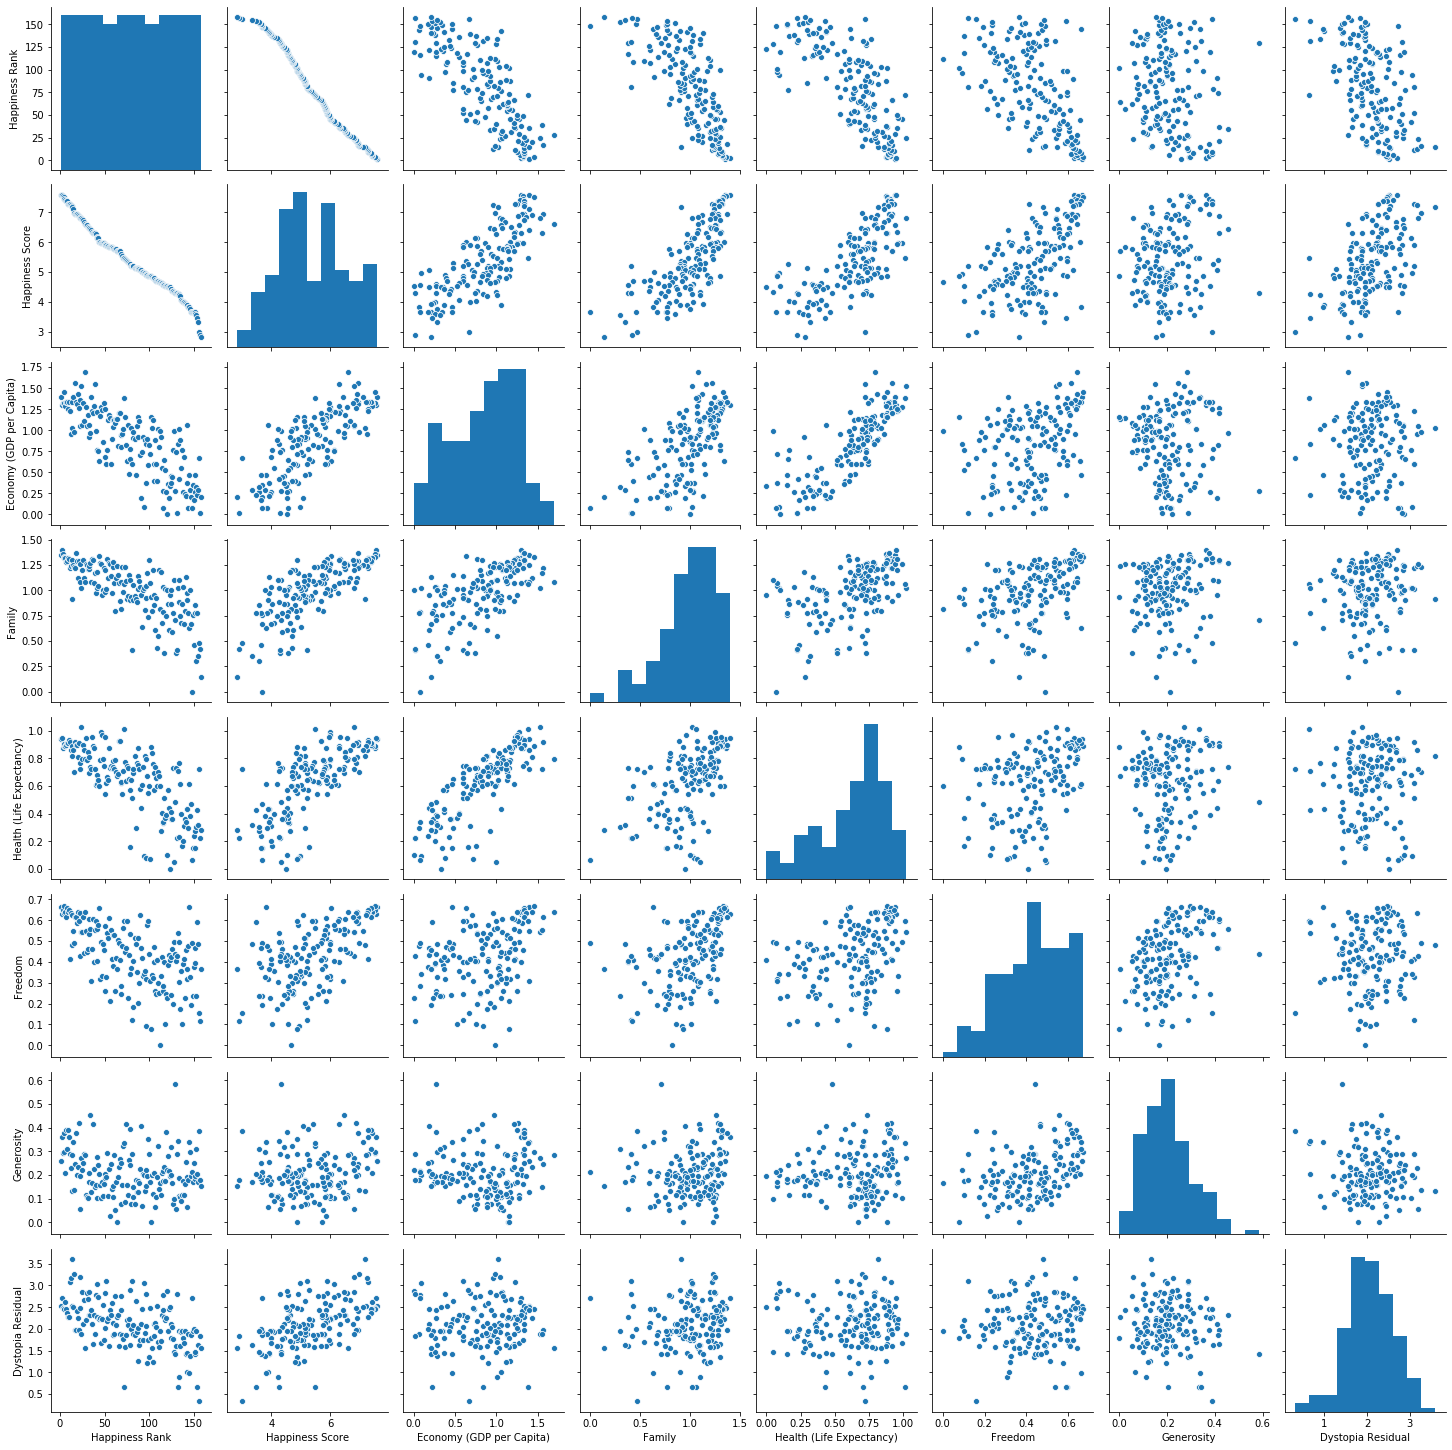

In [377]:
sns.pairplot(df)

In [378]:
df.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

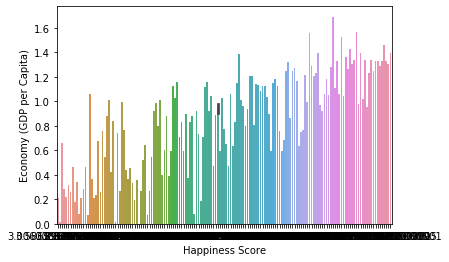

In [379]:
sns.barplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)

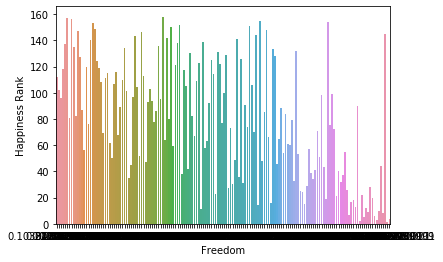

In [380]:
sns.barplot(x='Freedom',y='Happiness Rank',data=df)

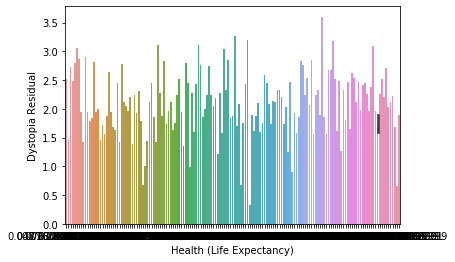

In [381]:
sns.barplot(x='Health (Life Expectancy)',y='Dystopia Residual',data=df)

# we don't required country and Region, so we are dropping these two columns.

In [382]:
df.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.259884,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.362070,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.293706,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.297872,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.377141,2.45176


In [383]:
df.shape

(158, 8)

# Removing outliers

In [384]:
from scipy.stats import zscore

In [385]:
z=np.abs(zscore(df))
z

array([[1.72099989, 1.93736005, 1.36962124, ..., 1.57743784, 0.52680978,
        0.75825809],
       [1.69907456, 1.91458063, 1.13522625, ..., 1.33245589, 1.56369393,
        1.09285682],
       [1.67714922, 1.88479215, 1.19286069, ..., 1.4696591 , 0.87000346,
        0.71233526],
       ...,
       [1.67742676, 2.0761992 , 0.45524543, ..., 1.80923785, 1.81137234,
        3.20843049],
       [1.69935209, 2.1646885 , 2.06756644, ..., 2.06447176, 0.28333124,
        0.48198451],
       [1.72127743, 2.22251319, 1.58633379, ..., 0.42662099, 0.54482432,
        0.96361241]])

In [386]:
threshold=3
print(np.where(z>3))

(array([128, 147, 155, 157], dtype=int64), array([6, 3, 7, 3], dtype=int64))


In [387]:
df1=df[(z<3).all(axis=1)]
df1

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.259884,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.362070,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.293706,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.297872,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.377141,2.45176
...,...,...,...,...,...,...,...,...
151,152,3.587,0.25812,0.85188,0.27125,0.39493,0.196775,1.46494
152,153,3.575,0.31982,0.30285,0.30335,0.23414,0.311228,1.95210
153,154,3.465,0.22208,0.77370,0.42864,0.59201,0.203985,0.67042
154,155,3.340,0.28665,0.35386,0.31910,0.48450,0.167715,1.63328


In [388]:
df1.shape

(154, 8)

In [398]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.72099989],
       [-1.69907456],
       [-1.67714922],
       [-1.65522389],
       [-1.63329856],
       [-1.61137323],
       [-1.58944789],
       [-1.56752256],
       [-1.54559723],
       [-1.52367189],
       [-1.50174656],
       [-1.47982123],
       [-1.45789589],
       [-1.43597056],
       [-1.41404523],
       [-1.39211989],
       [-1.37019456],
       [-1.34826923],
       [-1.32634389],
       [-1.30441856],
       [-1.28249323],
       [-1.26056789],
       [-1.23864256],
       [-1.21671723],
       [-1.19479189],
       [-1.17286656],
       [-1.15094123],
       [-1.12901589],
       [-1.10709056],
       [-1.08516523],
       [-1.06323989],
       [-1.04131456],
       [-1.01938923],
       [-0.99746389],
       [-0.97553856],
       [-0.95361323],
       [-0.93168789],
       [-0.90976256],
       [-0.88783723],
       [-0.8659119 ],
       [-0.84398656],
       [-0.82206123],
       [-0.8001359 ],
       [-0.77821056],
       [-0.75628523],
       [-0

In [399]:
x=df.iloc[:,0].values

In [400]:
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  82,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158], dtype=int64)

In [401]:
x.shape

(158,)

In [402]:
y=df.iloc[:,-1].values
y

array([2.51738, 2.70201, 2.49204, 2.46531, 2.45176, 2.61955, 2.4657 ,
       2.37119, 2.26425, 2.26646, 3.08854, 3.17728, 2.5332 , 3.60214,
       2.51011, 3.26001, 1.96961, 1.9757 , 2.41484, 2.24743, 1.96994,
       2.47489, 3.19131, 1.88501, 2.84848, 2.11569, 2.67585, 1.55674,
       2.21126, 2.836  , 2.67782, 2.32142, 2.85737, 2.31945, 2.43872,
       2.12367, 1.6488 , 2.32323, 1.87634, 2.79094, 2.26882, 3.035  ,
       2.74255, 2.23741, 2.24639, 1.68435, 2.21978, 2.53942, 1.73797,
       2.02518, 2.82334, 3.10712, 2.18896, 2.24729, 1.61583, 2.44649,
       2.32407, 2.5945 , 2.1309 , 1.86565, 1.88541, 2.75414, 2.09066,
       2.27394, 2.32038, 1.59888, 1.88931, 2.43209, 2.76579, 1.86984,
       1.76145, 0.65429, 1.58782, 1.86399, 2.20173, 2.08528, 2.2327 ,
       2.89319, 1.63794, 2.00073, 3.10709, 1.87996, 2.10017, 1.8604 ,
       2.6343 , 1.93129, 2.025  , 1.26462, 1.62215, 1.7536 , 2.11032,
       2.45373, 1.73933, 3.05137, 1.89894, 2.06367, 2.79832, 1.21305,
       1.73799, 1.34

In [403]:
y.shape

(158,)

In [404]:
x = x.reshape(-1,1)

In [405]:
y = y.reshape(-1,1)

In [406]:
x

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [407]:
y

array([[2.51738],
       [2.70201],
       [2.49204],
       [2.46531],
       [2.45176],
       [2.61955],
       [2.4657 ],
       [2.37119],
       [2.26425],
       [2.26646],
       [3.08854],
       [3.17728],
       [2.5332 ],
       [3.60214],
       [2.51011],
       [3.26001],
       [1.96961],
       [1.9757 ],
       [2.41484],
       [2.24743],
       [1.96994],
       [2.47489],
       [3.19131],
       [1.88501],
       [2.84848],
       [2.11569],
       [2.67585],
       [1.55674],
       [2.21126],
       [2.836  ],
       [2.67782],
       [2.32142],
       [2.85737],
       [2.31945],
       [2.43872],
       [2.12367],
       [1.6488 ],
       [2.32323],
       [1.87634],
       [2.79094],
       [2.26882],
       [3.035  ],
       [2.74255],
       [2.23741],
       [2.24639],
       [1.68435],
       [2.21978],
       [2.53942],
       [1.73797],
       [2.02518],
       [2.82334],
       [3.10712],
       [2.18896],
       [2.24729],
       [1.61583],
       [2.

In [452]:
from sklearn.linear_model import Lasso,Ridge

In [453]:
ls=Lasso(alpha=0.01)

In [454]:
ls.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [455]:
ls.score(x_train,y_train)

0.2642390627519682

In [456]:
ls.coef_

array([-0.00608516])

<BarContainer object of 158 artists>

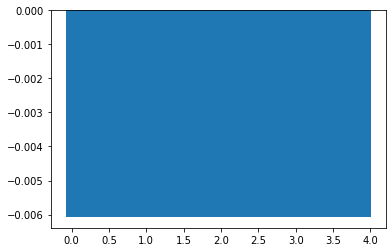

In [461]:
plt.bar((df['Dystopia Residual']),ls.coef_)

In [462]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [463]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=45)

In [464]:
max_r_score=0

In [465]:
for r_state in range(42,80):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r_state)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2 score corresponding to random state:', r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state

r2 score corresponding to random state: 42 is: 0.36548108321386763
r2 score corresponding to random state: 43 is: 0.3603731575493211
r2 score corresponding to random state: 44 is: 0.15926246157970048
r2 score corresponding to random state: 45 is: 0.1564923292300019
r2 score corresponding to random state: 46 is: 0.24709128057233654
r2 score corresponding to random state: 47 is: 0.3110084727959772
r2 score corresponding to random state: 48 is: 0.28993080376541236
r2 score corresponding to random state: 49 is: 0.07459979587457521
r2 score corresponding to random state: 50 is: 0.12385282649715068
r2 score corresponding to random state: 51 is: 0.3241491459564011
r2 score corresponding to random state: 52 is: -0.2659662291807867
r2 score corresponding to random state: 53 is: 0.2230993104638328
r2 score corresponding to random state: 54 is: 0.3534641122947836
r2 score corresponding to random state: 55 is: 0.40197929730295545
r2 score corresponding to random state: 56 is: 0.06028735207884228
r

In [485]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

-0.12939178714830069

In [486]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=60)
 lr=linear_model.LinearRegression()


In [487]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [488]:
print("r2score is :", r2_score(y_test,y_pred))
print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_pred)))

r2score is : 0.27071741023507556
RMSE is : 0.5202408181959401


In [492]:
from sklearn.externals import joblib
joblib.dump(lr,'lr_WorldHappiness.obj')

['lr_WorldHappiness.obj']